In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
%matplotlib inline

In [8]:
# Read the raw text files
austenRaw = open('data/austen.txt').read().lower()
melvilleRaw = open('data/melville.txt').read().lower()

In [9]:
austenRaw[:10] + melvilleRaw[:10]

'\ufeff\npride an\n\n\nmoby di'

In [10]:
meltokens = nltk.tokenize.word_tokenize(melvilleRaw)
austokens = nltk.tokenize.word_tokenize(austenRaw)

In [11]:
#remove punctuation
import string
meltokens = [word for word in meltokens if word.isalpha()]
austokens = [word for word in austokens if word.isalpha()]

In [12]:
def pieces(text, length, num): 
    out = [] 
    for x in range(num): 
        out.append(text[length*x:length*(x+1)])
    return out

#mel_pieces = [text1[:1000], text1[1001:2000, text1[2001:3000], text1[3001:4000]]

melpieces = pieces(meltokens, 1000, 4)
auspieces = pieces(austokens, 1000, 4)

In [13]:
def freqdists(pieceslist): 
    dists=[]
    for piece in pieceslist: 
        dists.append(nltk.FreqDist(piece).most_common())
    return dists

meldists = freqdists(melpieces)
ausdists = freqdists(auspieces)

In [14]:
meldists[0][:10]

[('the', 57),
 ('of', 33),
 ('and', 33),
 ('to', 25),
 ('in', 18),
 ('a', 17),
 ('that', 16),
 ('his', 12),
 ('whale', 12),
 ('or', 10)]

In [15]:
def makeDataFrame(piece, label):
    return pd.DataFrame(piece, columns=['word', label])

In [16]:
def makeDataFrameList(distlist, label):
    dfs = []
    for idx, val in enumerate(distlist): 
        dfs.append(makeDataFrame(val, label+str(idx)))    
    return dfs

In [17]:
meldfs = makeDataFrameList(meldists, 'mel')
ausdfs = makeDataFrameList(ausdists, 'aus')

In [18]:
def selfMergeDF(dflist): 
    for df in dflist[1:]: 
        dflist[0] = pd.merge(dflist[0], df, how='outer', on='word')
    return dflist[0]

In [19]:
bigMelTable = selfMergeDF(meldfs)
bigAusTable = selfMergeDF(ausdfs)

In [20]:
masterTable = selfMergeDF([bigMelTable, bigAusTable])

In [21]:
# Set index to 'word'
masterTable = masterTable.set_index('word')

In [22]:
# Change NaNs to 0.
masterTable = masterTable.fillna(0)

In [23]:
masterTable

,mel0,mel1,mel2,mel3,aus0,aus1,aus2,aus3
word,,,,,,,,
the,57,65,81,82,24,43,43,32
of,33,39,42,44,33,28,23,33
and,33,31,29,28,21,25,34,36
to,25,32,15,24,28,33,26,30
in,18,37,27,20,15,10,15,21
a,17,28,35,23,24,17,22,19
that,16,13,7,6,19,12,8,7
his,12,15,3,6,13,6,23,18
whale,12,18,26,13,0,0,0,0


In [155]:
masterTable['mel0']

word
the            57
and            33
of             33
to             25
in             18
a              17
that           16
whale          12
his            12
is             10
or             10
for            10
it              9
by              9
he              8
as              8
this            8
great           8
which           8
with            8
leviathan       7
whales          6
be              6
ye              5
him             5
up              5
had             5
take            5
one             5
all             5
               ..
owner           0
established     0
ostentation     0
amount          0
thereby         0
fourth          0
candid          0
anxious         0
expressed       0
deeply          0
liberty         0
related         0
habit           0
convinced       0
accidental      0
rank            0
fancying        0
ease            0
seek            0
finery          0
wonder          0
inquired        0
dresses         0
makes           0
affec

In [24]:
from sklearn.decomposition import PCA

In [126]:
pca = PCA(n_components=2)

In [147]:
pcaOut = pca.fit(masterTable)

In [151]:
components = pcaOut.components_
components

array([[-0.33461792, -0.39238274, -0.40572197, -0.40043325, -0.30089987,
        -0.3231697 , -0.32756998, -0.3268456 ],
       [ 0.16816824,  0.28551386,  0.4327692 ,  0.33837925, -0.48743534,
        -0.36355942, -0.29523392, -0.36260149]])

In [164]:
melx = components[0][:4]
mely = components[1][:4]
ausx = components[0][4:]
ausy = components[1][4:]

In [175]:
[x for x in zip(components[0], components[1])]

[(-0.33461791625639664, 0.16816824218295531),
 (-0.39238274343269386, 0.28551386175584453),
 (-0.4057219679454297, 0.4327692041605104),
 (-0.40043325327915413, 0.33837924638247879),
 (-0.3008998726773634, -0.4874353439821647),
 (-0.32316969544777652, -0.36355941763402827),
 (-0.32756998295491824, -0.29523392433243401),
 (-0.32684560270114282, -0.36260149451447221)]

In [156]:
df = pd.DataFrame(components)

## This is a heading

This is an _italicized phrase_. ^[This is a footnote.]


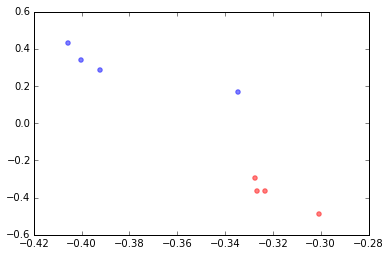

In [173]:
plt.scatter(melx, mely, color='blue', alpha=0.5)
plt.scatter(ausx, ausy, color='red', alpha=0.5)

In [1]:
# adapted from http://sebastianraschka.com/Articles/2014_pca_step_by_step.html#appendix-b

def pca_cor(X):

    # Standardize data
    X_std = StandardScaler().fit_transform(X)

    # Compute the correlation matrix
    cor_mat = np.corrcoef(X.T)

    # Eigendecomposition of the correlation matrix
    eig_val_cor, eig_vec_cor = np.linalg.eig(cor_mat)

    # Make a list of (eigenvalue, eigenvector) tuples
    # and sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs_cor = [(np.abs(eig_val_cor[i]), eig_vec_cor[:,i]) for i in range(len(eig_val_cor))]
    eig_pairs_cor.sort()
    eig_pairs_cor.reverse()

    # Construct the transformation matrix W from the eigenvalues that correspond to
    # the k largest eigenvalues (here: k = 2)
    matrix_w_cor = np.hstack((eig_pairs_cor[0][1].reshape(4,1), eig_pairs_cor[1][1].reshape(4,1)))

    # Transform the data using matrix W
    X_transf = matrix_w_cor.T.dot(X_std.T).T

    # Plot the data
    plt.scatter(X_transf[:,0], X_transf[:,1])
    plt.title('PCA based on the correlation matrix of the raw data')
    plt.show()

In [4]:
from sklearn.preprocessing import *

In [5]:
StandardScaler()

/usr/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
pca_cor(masterTable)

ValueError: total size of new array must be unchanged